In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics                               # measures to check our models
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\super\Desktop\FRI 2019\DATA\calculations.csv")

In [4]:
df.head()

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place
0,Brisket 1-204H.csv,33900,88867.87,4536,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05
1,Brisket 1-44H.csv,3900,6117.40,8435,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04
2,Brisket 10-65H.csv,14400,83103.15,6006,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06
3,Brisket 2-149H.csv,62100,85911.09,6622,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05
4,Brisket 3-212H.csv,43000,21815.15,8230,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05


In [5]:
recoverable = df['original oil in place']*df['recovery factor']

In [6]:
recoverable

0      28920.062300
1        924.778265
2     122174.025604
3       9858.100054
4      72551.465773
          ...      
95    184499.495891
96     57927.876387
97     70681.782215
98       305.811816
99     27256.612570
Length: 100, dtype: float64

In [7]:
df['recovery reserves'] = recoverable

In [8]:
df.head()

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place,recovery reserves
0,Brisket 1-204H.csv,33900,88867.87,4536,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05,28920.062300
1,Brisket 1-44H.csv,3900,6117.40,8435,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04,924.778265
2,Brisket 10-65H.csv,14400,83103.15,6006,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06,122174.025604
3,Brisket 2-149H.csv,62100,85911.09,6622,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05,9858.100054
4,Brisket 3-212H.csv,43000,21815.15,8230,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05,72551.465773


In [9]:
Name = df['Name']
rec_fac = df['recovery factor']
orig_oil = df['original oil in place']
rec_rev = df['recovery reserves']

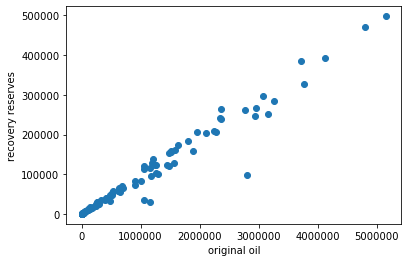

In [10]:
plt.scatter(orig_oil, rec_rev, alpha=1)
plt.xlabel('original oil')
plt.ylabel('recovery reserves')
plt.show()

In [11]:
slope, intercept, r_value, p_value, std_err = st.linregress(orig_oil, rec_rev)

print(
    "The model parameters are, slope (b1) = "
    + str(round(slope, 2))
    + ", and the intercept (b0) = "
    + str(round(intercept, 2))
)

The model parameters are, slope (b1) = 0.09, and the intercept (b0) = -262.48


In [13]:
X = orig_oil.values.reshape(-1,1)
y = rec_rev.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

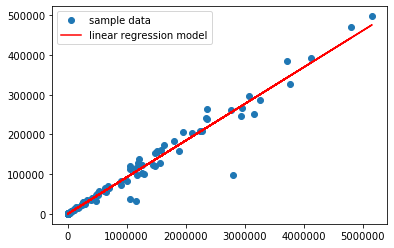

In [17]:
plt.plot(orig_oil, rec_rev, "o", label="sample data")
plt.plot(orig_oil, intercept + slope * orig_oil, "r", label="linear regression model")
plt.legend()
plt.show()

In [25]:
y_pred = regressor.predict(X_test)
x = orig_oil
y = rec_rev
np.interp(2021496, x,y)

27256.612569915516

In [19]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,119768.349107,96787.483317
1,385883.838157,339956.564874
2,122174.025604,114912.187946
3,82795.059563,83420.685029
4,54787.991220,60320.455472
5,48806.778879,45363.587250
6,122520.354317,131985.854544
7,173268.573769,149499.435470
8,17005.437501,17676.146899
9,184499.495891,165554.779635


In [93]:
X = rec_fac.values.reshape(-1,1)
y = rec_rev.values.reshape(-1,1)
clf = KernelRidge(alpha=0.00000000001, kernel = "rbf")
clf.fit(X, y)

KernelRidge(alpha=1e-11, coef0=1, degree=3, gamma=None, kernel='rbf',
            kernel_params=None)

In [94]:
clf.score(X, y)

0.0779414237828353

In [95]:
xp = np.linspace(rec_fac.min(), rec_fac.max(), 501)

In [96]:
yp = clf.predict(xp.reshape(-1,1))

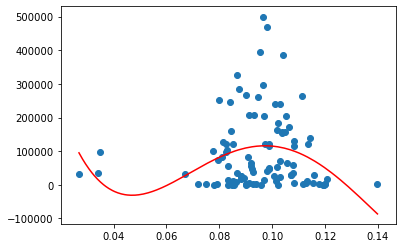

In [97]:
plt.plot(xp, yp, 'r')
plt.scatter(rec_fac, rec_rev)

In [ ]:
#the next 10 wells must be or close to fit these lines of best fit based on recovery factor and original oil in place. 